**MNIST Handwritten Digit Classification Using Deep Learning**

# Importing Packages

In [ ]:
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import shift
import numpy as np
%matplotlib inline
from IPython.display import Image

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.simplefilter('ignore')

# Loading Data from MNIST

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Shapes of training set and labels
print("Training set (images) shape: {shape}".format(shape=train_data.shape))
print("Training set (labels) shape: {shape}".format(shape=train_labels.shape))

# Shapes of test set and labels
print("Test set (images) shape: {shape}".format(shape=test_data.shape))
print("Test set (labels) shape: {shape}".format(shape=test_labels.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


# Data Exploration

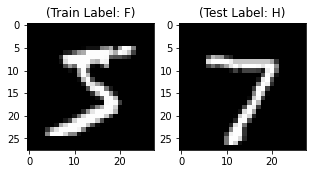

In [ ]:
# Create dictionary of target classes
label_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_data[0], (28, 28))
curr_lbl = train_labels[0]
plt.title("(Train Label: " + str(label_dict[curr_lbl]) + ")")
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[0], (28, 28))
curr_lbl = test_labels[0]
plt.title("(Test Label: " + str(label_dict[curr_lbl]) + ")")
plt.imshow(curr_img, cmap='gray')

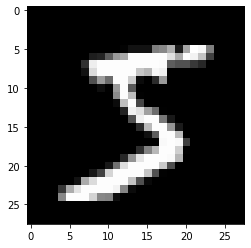

In [ ]:
a=train_data[0]
plt.imshow(a, cmap='gray')

In [ ]:
m = 3
n = 4
a = np.empty((m,n))
a.shape
b = a.reshape(2, -1, 2)
b.shape


(2, 3, 2)

# Data Preprocessing

In [ ]:
# Convert each 28 x 28 image of train and test set into a matrix of size 28 x 28 x 1, that can be feed into the network
train_data = train_data.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)
print('Shape of training and testing data :{}, {}'.format(train_data.shape, test_data.shape))

# Converting the data type of the training and testing data to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
# Checking the data type of the training and testing data
print("train/ test data type ==>", train_data.dtype, test_data.dtype)

# Finding maximum pixel value of the training and testing data
max_train, max_test = np.max(train_data), np.max(test_data)
print('Maximum pixel value of the training and testing data: {}, {}'.format(max_train, max_test))

# Normalizing the data to help with the training
train_data = train_data / max_train
test_data = test_data / max_test

# Checking maximum pixel value of the training and testing data after rescaling
max_train, max_test = np.max(train_data), np.max(test_data)
print('Maximum pixel value of the training and testing data after rescaling: {}, {}'.format(max_train, max_test))

Shape of training and testing data :(60000, 28, 28, 1), (10000, 28, 28, 1)
train/ test data type ==> float32 float32
Maximum pixel value of the training and testing data: 255.0, 255.0
Maximum pixel value of the training and testing data after rescaling: 1.0, 1.0


# Prepare training, validation and test dataset

In [ ]:
# One-hot encoding
train_Y_one_hot = to_categorical(train_labels)
test_Y_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

# Splitting the data into training and validation set, split ratio-80%:20%
train_X, valid_X, train_label, valid_label = train_test_split(train_data, train_Y_one_hot, test_size=0.2, random_state=13)
print("\nDimensions of train/ validation/ testing inputs/ outputs ==>")
train_X.shape, valid_X.shape, test_data.shape, train_label.shape, valid_label.shape, test_Y_one_hot.shape

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Dimensions of train/ validation/ testing inputs/ outputs ==>


((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (10000, 28, 28, 1),
 (48000, 10),
 (12000, 10),
 (10000, 10))

# Define deep learning model using cross_entropy loss function and rms prop

In [ ]:
# build the model object
model = Sequential()


# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))
# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
type(model)

keras.engine.sequential.Sequential

# Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(train_X, train_label, batch_size=32, epochs=12,
          validation_data=(valid_X, valid_label), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/12

Epoch 1: val_loss improved from inf to 0.06755, saving model to model.weights.best.hdf5
1500/1500 - 73s - loss: 0.1534 - accuracy: 0.9523 - val_loss: 0.0675 - val_accuracy: 0.9788 - 73s/epoch - 48ms/step
Epoch 2/12

Epoch 2: val_loss improved from 0.06755 to 0.04456, saving model to model.weights.best.hdf5
1500/1500 - 71s - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0446 - val_accuracy: 0.9860 - 71s/epoch - 48ms/step
Epoch 3/12

Epoch 3: val_loss improved from 0.04456 to 0.03972, saving model to model.weights.best.hdf5
1500/1500 - 66s - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0397 - val_accuracy: 0.9890 - 66s/epoch - 44ms/step
Epoch 4/12

Epoch 4: val_loss did not improve from 0.03972
1500/1500 - 72s - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0428 - val_accuracy: 0.9887 - 72s/epoch - 48ms/step
Epoch 5/12

Epoch 5: val_loss improved from 0.03972 to 0.03906, saving model to model.weights.best.hdf5
1500/1500 - 68s - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

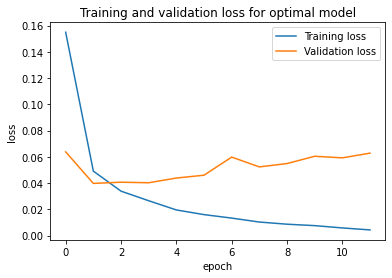

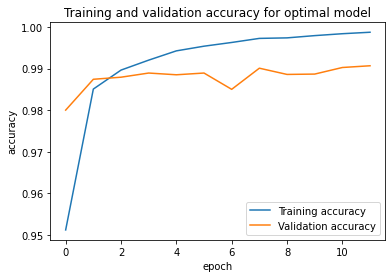

In [ ]:
# Plot the accuracy and loss for training and validation dataset
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(range(12), loss, label='Training loss')
plt.plot(range(12), val_loss, label='Validation loss')
plt.title('Training and validation loss for optimal model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(range(12), accuracy, label='Training accuracy')
plt.plot(range(12), val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy for optimal model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Evaluating the optimal model on Test Dataset

In [ ]:
test_eval = model.evaluate(test_data, test_Y_one_hot, verbose=0)
print('Testing loss:', test_eval[0])
print('Testing accuracy:', test_eval[1])

# Pedicting labels
predicted_classes = model.predict(test_data)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
print("Dimension of predicted and test lables ==>", predicted_classes.shape, test_labels.shape)

Testing loss: 0.034502945840358734
Testing accuracy: 0.9890000224113464
313/313 [==============================] - 4s 14ms/step
Dimension of predicted and test lables ==> (10000,) (10000,)


Found 9877 correct labels



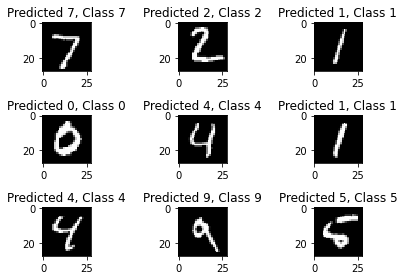

In [ ]:
# Plot test images, predicted correctly
correct = np.where(predicted_classes==test_labels)[0]
print("Found %d correct labels\n" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_data[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

Found 123 incorrect labels



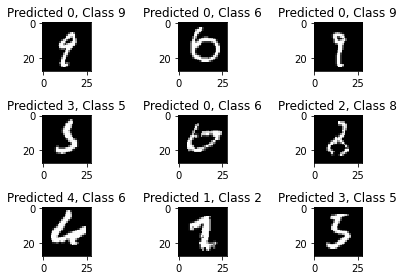

In [ ]:
# Plot test images, predicted incorrectly
incorrect = np.where(predicted_classes!=test_labels)[0]
print("Found %d incorrect labels\n" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

# Overall optimal_model accuracy and in-class metrices

In [ ]:
print('Accuracy classification score: {}\n'.format(accuracy_score(test_labels, predicted_classes)*100))
print('Confusion matrix: \n')
print(confusion_matrix(test_labels, predicted_classes))
num_classes=10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print('\n\nClassification Report: \n')
print(classification_report(test_labels, predicted_classes, target_names=target_names))

Accuracy classification score: 98.77

Confusion matrix: 

[[ 977    0    0    0    0    0    0    1    2    0]
 [   3 1130    2    0    0    0    0    0    0    0]
 [   4    2 1023    1    1    0    0    1    0    0]
 [   0    0    2 1006    0    0    0    1    1    0]
 [   2    0    0    0  972    0    0    0    3    5]
 [   4    0    0    8    0  873    1    1    3    2]
 [  11    2    0    1    4    1  937    0    2    0]
 [   0    2    8    0    0    1    0 1013    1    3]
 [   4    0    2    1    0    0    0    1  965    1]
 [   8    3    0    1    6    4    0    2    4  981]]


Classification Report: 

              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98       980
     Class 1       0.99      1.00      0.99      1135
     Class 2       0.99      0.99      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.98      0.99       892
     